In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

{}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d 'alifrahman/covid19-chest-xray-image-dataset'

Dataset URL: https://www.kaggle.com/datasets/alifrahman/covid19-chest-xray-image-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 67% 27.0M/40.6M [00:00<00:00, 90.5MB/s]
100% 40.6M/40.6M [00:00<00:00, 111MB/s] 


In [ ]:
! unzip '/content/covid19-chest-xray-image-dataset.zip'

Archive:  /content/covid19-chest-xray-image-dataset.zip
  inflating: dataset/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: dataset/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: dataset/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: dataset/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: dataset/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: dataset/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: dataset/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: dataset/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.png  
  inflating: dataset/covid/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg  
  inflating: dataset/covid

In [ ]:
!pip install keras

In [ ]:
!pip install imutils

In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions



In [ ]:
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
dataset = "/content/dataset"

In [ ]:
args={}
args["dataset"]=dataset

# **Data-Augmentation**

In [ ]:
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imutils import paths

# Define paths
dataset_path = args["dataset"]  # Adjust this path if needed
augmented_dataset_path = 'content/augmented_dataset'

# Create directories for augmented images
if not os.path.exists(augmented_dataset_path):
    os.makedirs(augmented_dataset_path)
for folder in ['covid', 'normal']:
    if not os.path.exists(os.path.join(augmented_dataset_path, folder)):
        os.makedirs(os.path.join(augmented_dataset_path, folder))

# Initialize ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Iterate through each class folder
for folder in ['covid', 'normal']:
    folder_path = os.path.join(dataset_path, folder)
    augmented_folder_path = os.path.join(augmented_dataset_path, folder)

    # Get image paths in the current folder
    iPaths = list(paths.list_images(folder_path))

    # Process and augment images
    for iPath in iPaths:
        # Read and preprocess image
        image = cv2.imread(iPath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))

        # Convert image to array and add batch dimension
        image_array = np.expand_dims(image, 0)

        # Generate and save augmented images
        i = 0
        for batch in datagen.flow(image_array, batch_size=1):
            augmented_image = batch[0].astype('uint8')
            aug_image_path = os.path.join(augmented_folder_path, f"{folder}_{os.path.basename(iPath).split('.')[0]}_{i}.jpg")
            cv2.imwrite(aug_image_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))
            i += 1
            if i >= 4:  # Create 4 augmented images per original image
                break

# Print the number of images in each folder
for folder in ['covid', 'normal']:
    folder_path = os.path.join(augmented_dataset_path, folder)
    num_images = len(list(paths.list_images(folder_path)))
    print(f"Number of images in '{folder}' folder: {num_images}")


Number of images in 'covid' folder: 208
Number of images in 'normal' folder: 100


In [ ]:
import os
Data_Dir = "/content/content/augmented_dataset//"

In [ ]:
Cimages = os.listdir(Data_Dir+"covid")
Nimages = os.listdir(Data_Dir+"normal")

Normal Chest X-ray Vs Covid-19 Chest X-ray


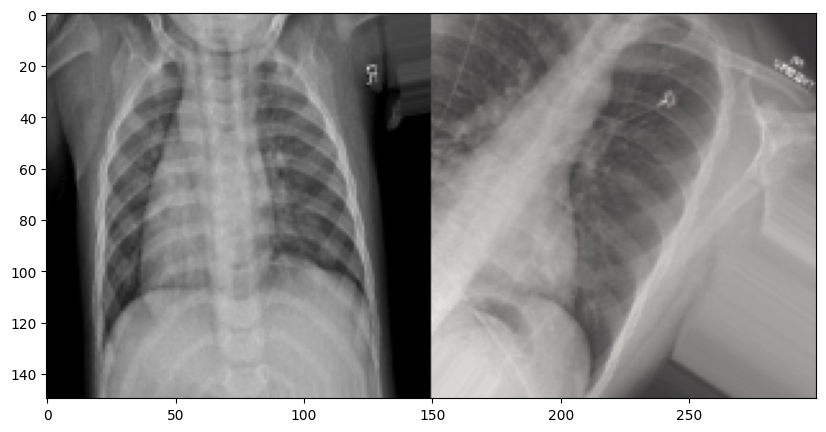

Normal Chest X-ray Vs Covid-19 Chest X-ray


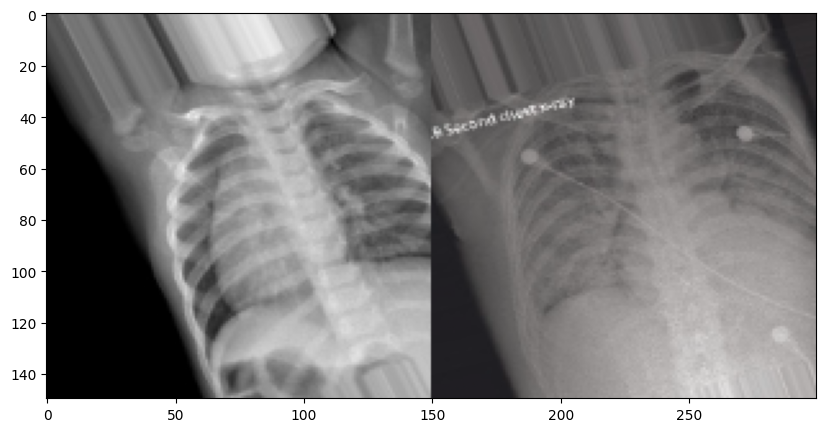

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    normal = cv2.imread(Data_Dir+"normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(Data_Dir+"covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,2):
    plotter(i)

In [ ]:
import os
import numpy as np
from imutils import paths
from sklearn.model_selection import train_test_split
import cv2

# Define paths
augmented_dataset_path = 'content/augmented_dataset'

data = []
labels = []

# Iterate through each class folder
for folder in ['covid', 'normal']:
    folder_path = os.path.join(augmented_dataset_path, folder)

    # Get image paths in the current folder
    iPaths = list(paths.list_images(folder_path))

    # Determine the label
    label = 1 if folder == 'covid' else 0

    # Process each image
    for iPath in iPaths:
        # Read and preprocess the image
        image = cv2.imread(iPath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert images to RGB channel
        image = cv2.resize(image, (224, 224))  # Resize the images to 224x224

        data.append(image)
        labels.append(label)

# Convert lists to numpy arrays and normalize the image data
data = np.array(data) / 255.0
labels = np.array(labels)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the splits
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Optional: Print a few labels to confirm binarization
print("Sample labels:")
print(labels[:10])

# Print confirmation
print("Label binarization and train-test split completed.")


Shape of X_train: (246, 224, 224, 3)
Shape of X_test: (62, 224, 224, 3)
Shape of y_train: (246,)
Shape of y_test: (62,)
Sample labels:
[1 1 1 1 1 1 1 1 1 1]
Label binarization and train-test split completed.


In [ ]:
X_train.shape[1:]

(224, 224, 3)

In [ ]:
y_train


array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1])

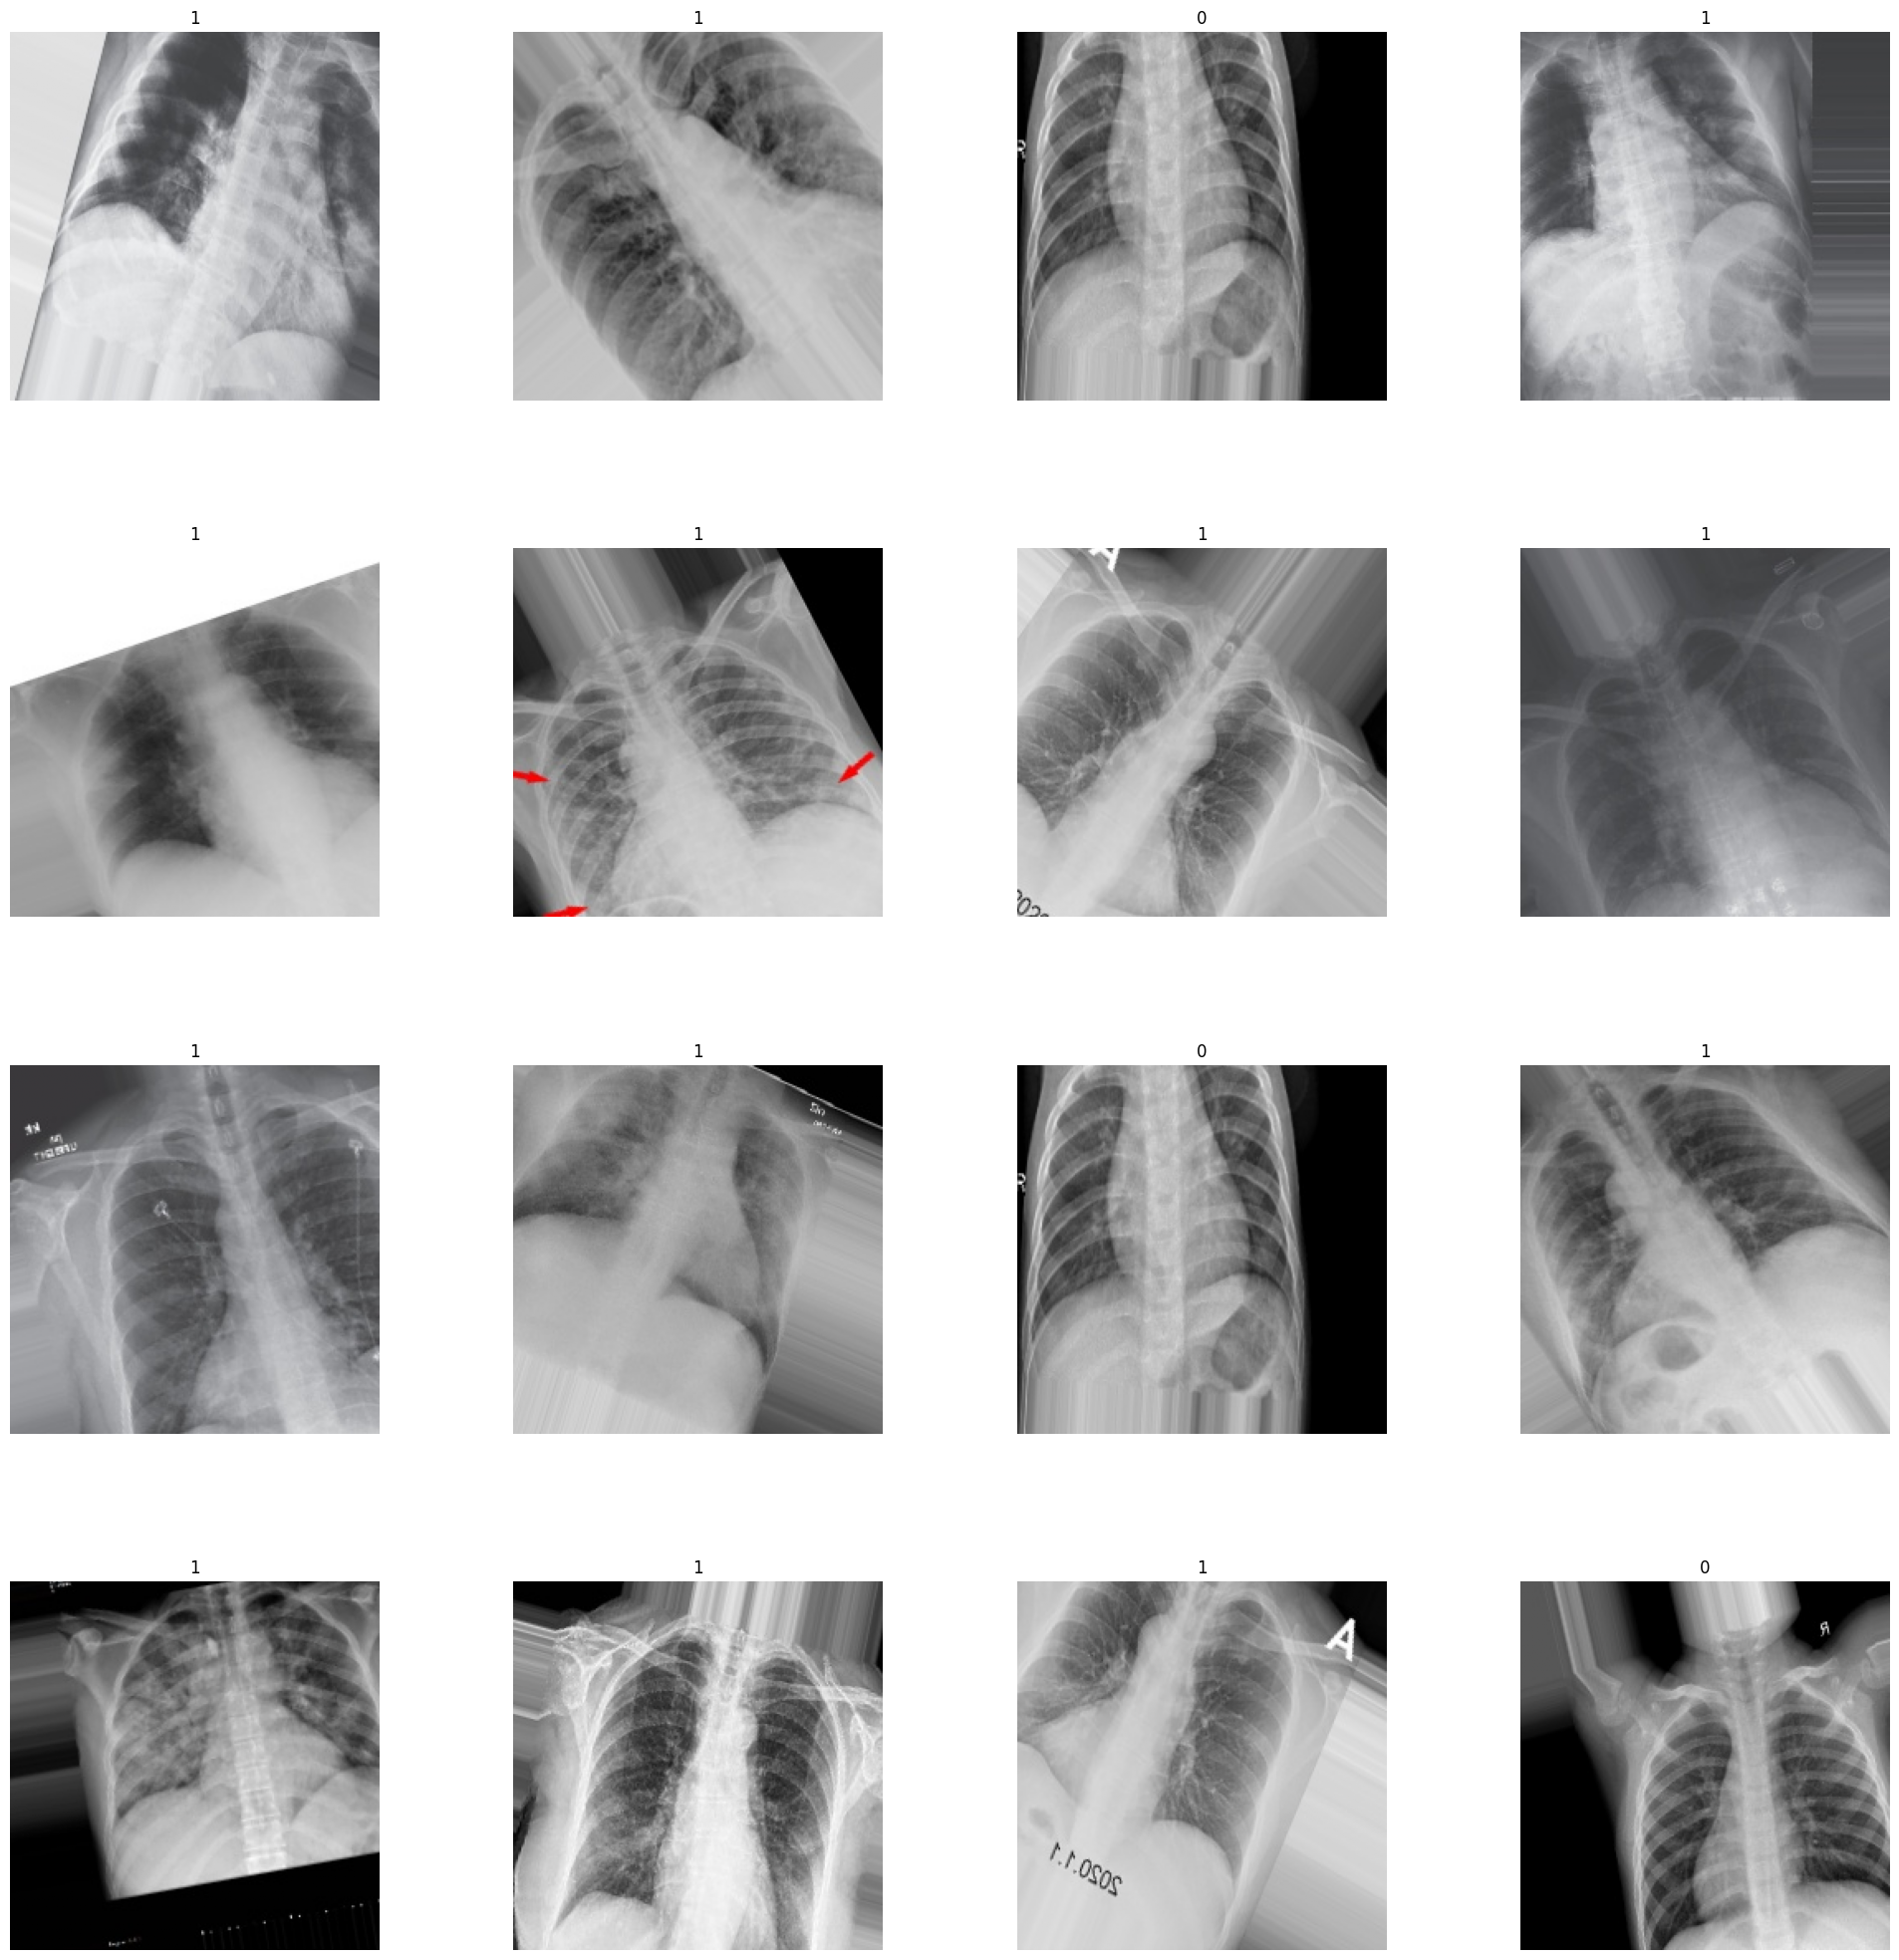

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

W_grid = 4 # width
L_grid = 4 # length
fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25)) # subplots
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    title = str(y_train[index])  # Convert Y_train[index] to a string
    axes[i].set_title(title)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()


# **VGG-16 MODEL**

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from keras.models import Model

base_model = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=X_train.shape[1:]))

head_model = base_model.output
head_model = AveragePooling2D(pool_size=(4, 4))(head_model)
head_model = Flatten(name="flatten")(head_model)
head_model = Dense(64, activation="relu")(head_model)
head_model = Dropout(0.5)(head_model)
head_model = Dense(1, activation="sigmoid")(head_model)

model = Model(inputs=base_model.input, outputs=head_model)


# Set layers in the base model to be non-trainable
for layer in base_model.layers:
    layer.trainable = False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
EPOCHS = 10
BS = 8

In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001)


In [ ]:
model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer=opt)
print("Compiling Starts")


Compiling Starts


In [ ]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# Train the model with the binary labels
R = model.fit(
    datagen.flow(X_train, y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, y_test),
    epochs=EPOCHS
)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 36s 951ms/step - accuracy: 0.6061 - loss: 0.7647 - val_accuracy: 0.9032 - val_loss: 0.5652
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6250 - loss: 0.6109 - val_accuracy: 0.9032 - val_loss: 0.5655
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.6971 - loss: 0.5844 - val_accuracy: 0.8226 - val_loss: 0.4538
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7500 - loss: 0.5127 - val_accuracy: 0.8226 - val_loss: 0.4473
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.7466 - loss: 0.5337 - val_accuracy: 0.8548 - val_loss: 0.3953
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7500 - loss: 0.4821 - val_accuracy: 0.8548 - val_loss: 0.3933
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.8165 - loss: 0.4507 - val_accuracy: 0.9032 - val_loss: 0.3537
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3750 - loss: 0.7591 - val_accuracy: 0.903

In [ ]:
# Save the model to a file
model.save("VGG16_MODEL.h5")

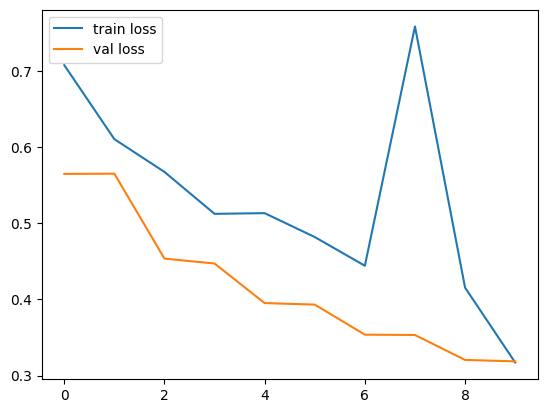

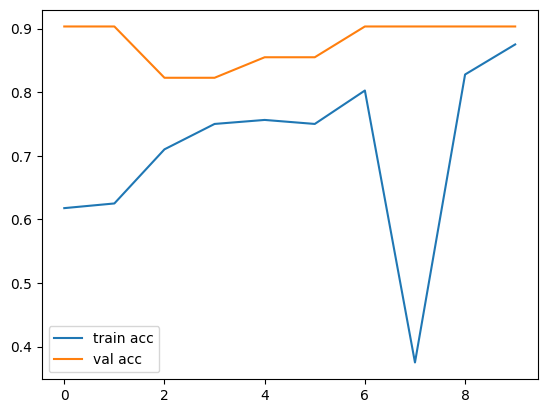

In [ ]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step


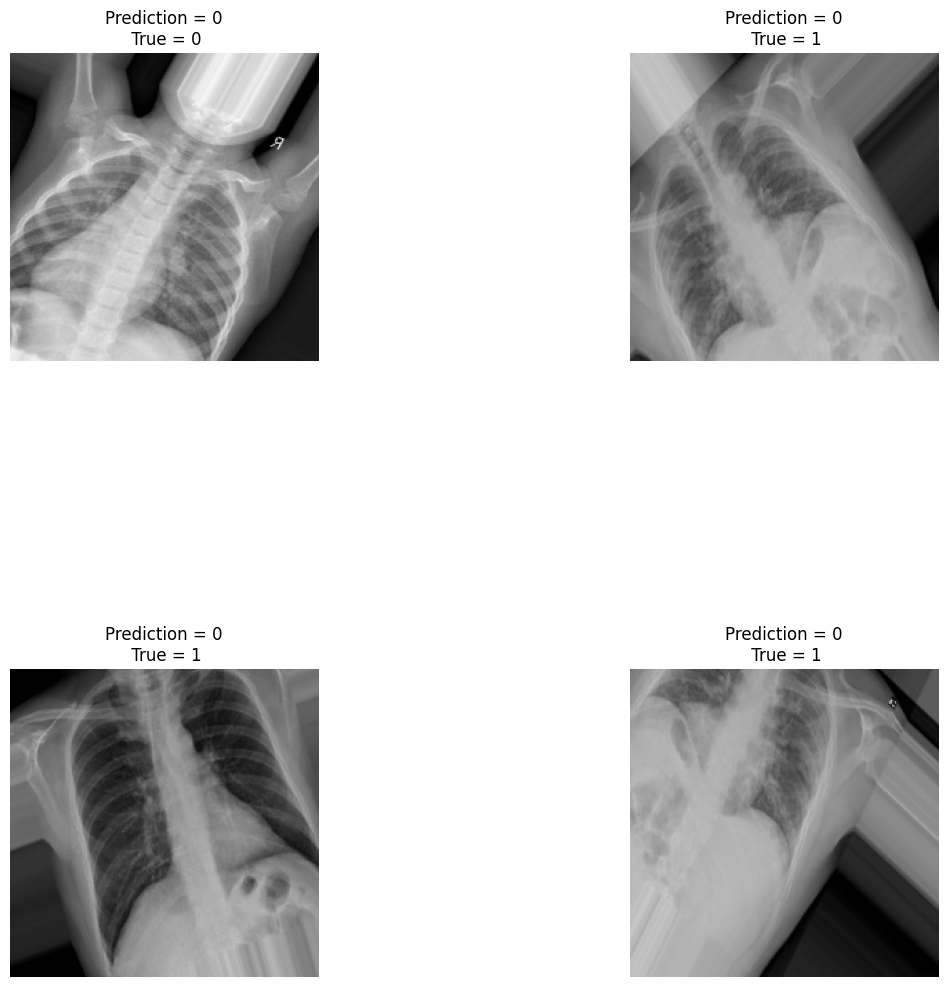

In [ ]:
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(np.argmax(y_pred[i]), # Use np.argmax without axis for 1D array
                                                           y_test[i])) # Removed argmax since y_test is already 1D
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 896ms/step
Accuracy: 0.9032
Precision: 0.8800
Recall: 1.0000
F1-Score: 0.9362

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        18
           1       0.88      1.00      0.94        44

    accuracy                           0.90        62
   macro avg       0.94      0.83      0.87        62
weighted avg       0.91      0.90      0.90        62



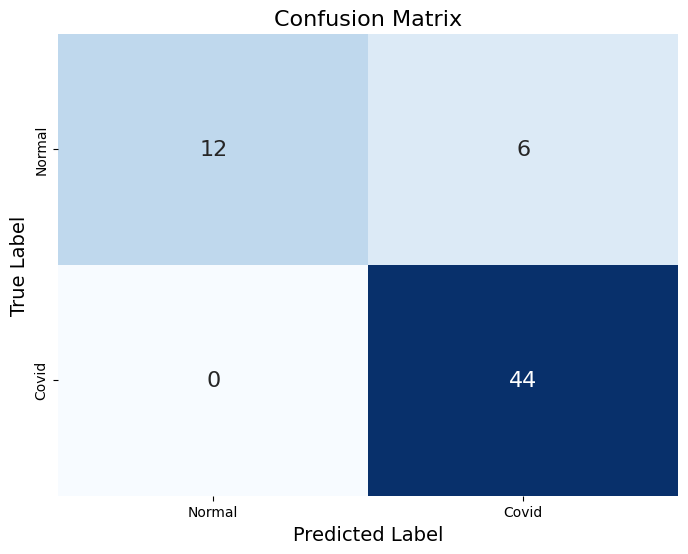

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

# Assuming the model has been trained and `X_test`, `y_test` are available

# Step 1: Predict the model
y_pred_prob = model.predict(X_test)  # Predict probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Step 2: Calculate accuracy, precision, recall, f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 3: Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16},xticklabels=['Normal', 'Covid'],yticklabels=['Normal','Covid'])
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


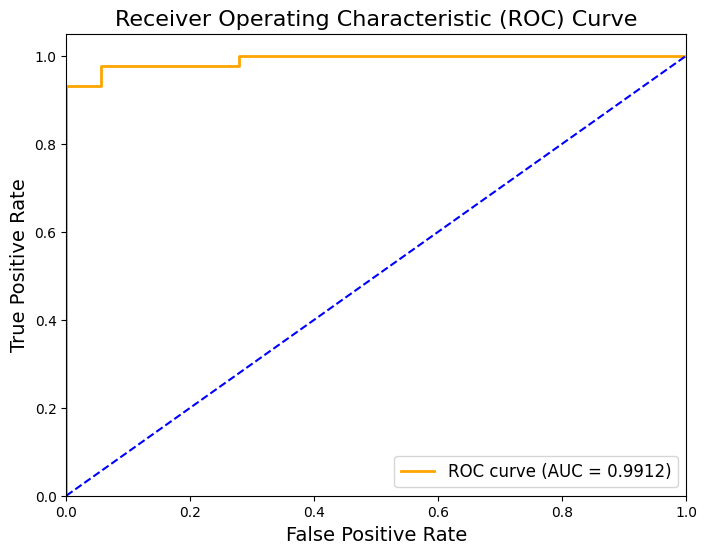

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()


# **RESNET50 MODEL**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

res = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
outputs = res.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(1, activation="sigmoid")(outputs)
model = Model(inputs=res.input, outputs=outputs)
for layer in res.layers:
  layer.trainable = False

# model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)


In [ ]:
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [ ]:
valAug = ImageDataGenerator()

In [ ]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=valAug.flow(X_test, y_test, batch_size=BS),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS
)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 725ms/step - accuracy: 0.4766 - loss: 0.9702 - val_accuracy: 0.7500 - val_loss: 0.5576
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.6875 - loss: 0.7469 - val_accuracy: 0.7500 - val_loss: 0.5513
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 984ms/step - accuracy: 0.6251 - loss: 0.7347 - val_accuracy: 0.6667 - val_loss: 0.6044
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.3125 - loss: 0.9781 - val_accuracy: 0.7083 - val_loss: 0.5849
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5470 - loss: 0.7877 - val_accuracy: 0.7708 - val_loss: 0.5601
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.6250 - loss: 0.5364 - val_accuracy: 0.7083 - val_loss: 0.5498
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6902 - loss: 0.6862 - val_accuracy: 0.7917 - val_loss: 0.5063
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.5625 - loss: 0.7347 - val_accuracy: 0.72

In [ ]:
model.save('ResNet50.h5')

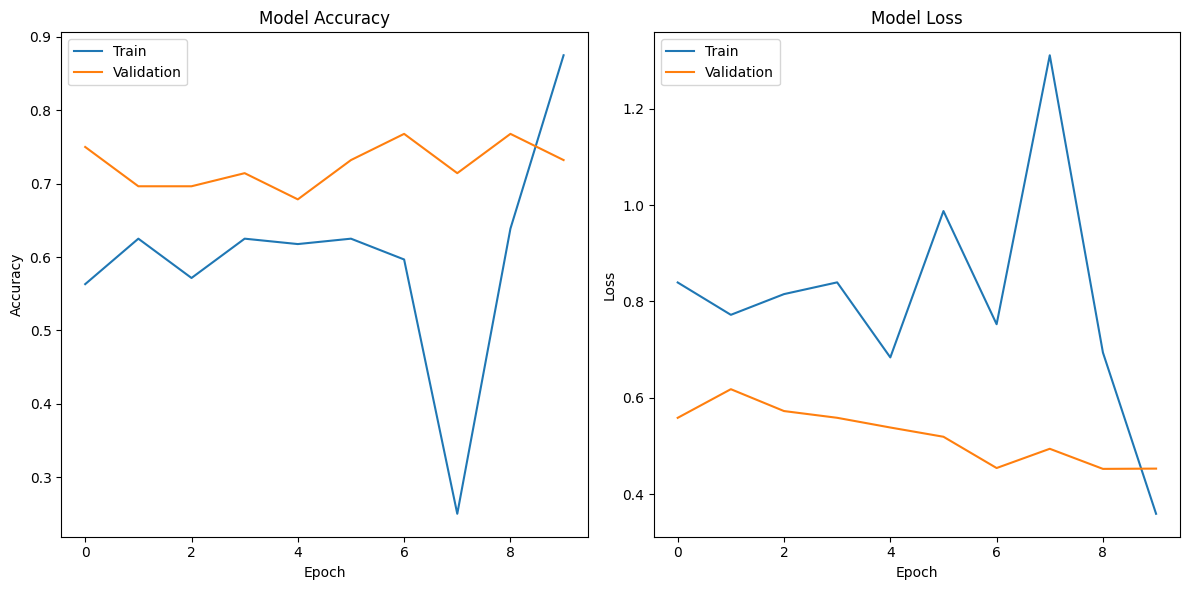

In [ ]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_history(history)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_731']
Received: inputs=Tensor(shape=(8, 224, 224, 3))
  warnings.warn(msg)


8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 631ms/step


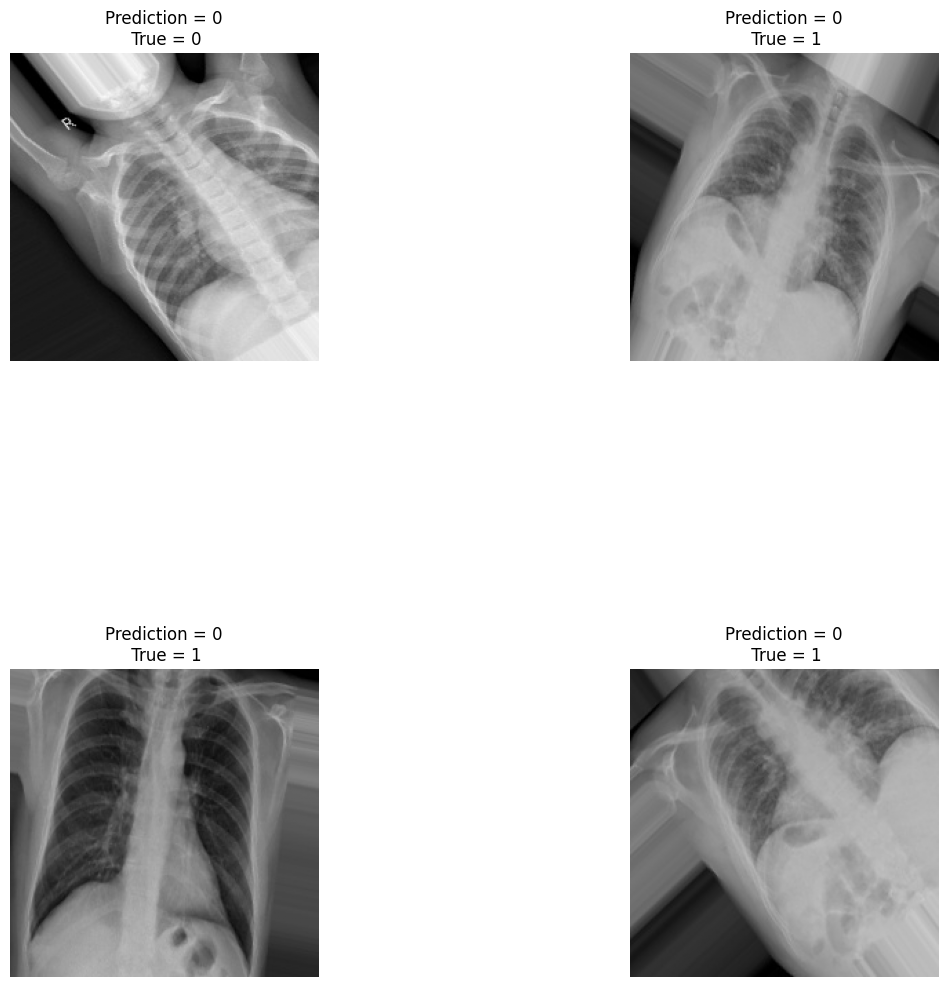

In [ ]:
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i],
                                                           y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step
Accuracy: 0.7097
Precision: 0.5036
Recall: 0.7097
F1-Score: 0.5892


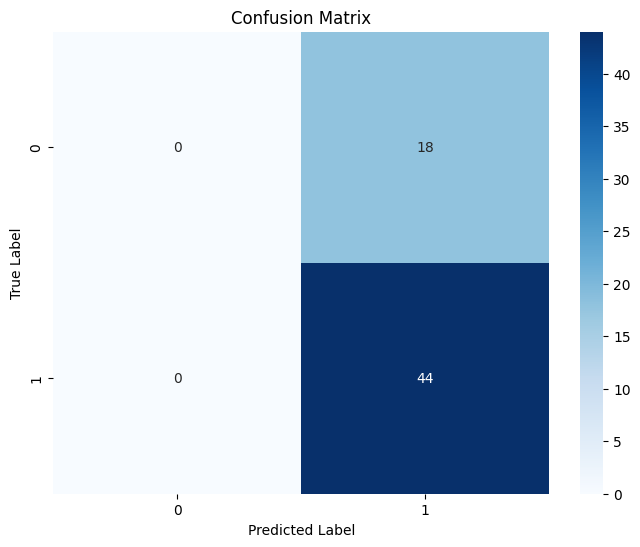

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred_prob = model.predict(X_test)  # Predict probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# **HYBRID (VGG-16 & ResNet-50) MODEL**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Input, Reshape, Conv2D, UpSampling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.applications import VGG16, ResNet50
from keras.layers import Input, Flatten, Dense, Reshape
from keras.models import Model


In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from skimage import exposure
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Load Pretrained VGG16 (without top layers)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features from intermediate layer
layer_name = 'block4_conv3'
intermediate_layer_model = Model(inputs=vgg_model.input,
                                 outputs=vgg_model.get_layer(layer_name).output)

# Extract features
features_train = intermediate_layer_model.predict(X_train)
features_test = intermediate_layer_model.predict(X_test)

# Flatten feature maps
features_train = features_train.reshape(features_train.shape[0], -1)
features_test = features_test.reshape(features_test.shape[0], -1)

# Normalize features
features_train = features_train / np.max(features_train)
features_test = features_test / np.max(features_test)

print("Extracted VGG16 Features Shape:", features_train.shape)


8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 399ms/step
Extracted VGG16 Features Shape: (246, 401408)


In [ ]:
# Visualize feature maps
for i in range(features_test.shape[1]):
    plt.figure()
    plt.imshow(features[0, :, :, i], cmap='viridis')
    plt.colorbar()
    plt.title(f'Feature Map {i+1}')
    plt.show()

NameError: name 'features' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet101  # Use ResNet101 for better learning
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Load ResNet101 without top layers (better than ResNet50)
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last 30 layers for fine-tuning
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Build the classifier
x = GlobalAveragePooling2D()(base_model.output)
x = BatchNormalization()(x)  # Normalization for stable training
x = Dropout(0.1)(x)  # Reduced dropout for better learning
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)  # Increased neurons
x = Dropout(0.1)(x)  # Second dropout layer
predictions = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))(x)

# Define Model
hybrid_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the Model with LR Scheduler
hybrid_model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Slightly higher LR
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Use ReduceLROnPlateau to adjust learning rate dynamically
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)




In [ ]:
y_train = np.array(y_train).reshape(-1, 1).astype(np.float32)  # (246, 1)
y_test = np.array(y_test).reshape(-1, 1).astype(np.float32)    # (62, 1)


In [ ]:
import hashlib
import numpy as np

def hash_images(images):
    return set([hashlib.md5(img.tobytes()).hexdigest() for img in images])

train_hashes = hash_images(X_train.astype(np.uint8))  # Ensure proper dtype
test_hashes = hash_images(X_test.astype(np.uint8))

intersection = train_hashes.intersection(test_hashes)
print(f"Number of overlapping images: {len(intersection)}")


Number of overlapping images: 1


In [ ]:
import numpy as np

# Convert images to hash values
train_hashes = {hashlib.md5(img.tobytes()).hexdigest(): idx for idx, img in enumerate(X_train)}
test_hashes = {hashlib.md5(img.tobytes()).hexdigest(): idx for idx, img in enumerate(X_test)}

# Find the duplicate image
duplicate_hashes = set(train_hashes.keys()).intersection(set(test_hashes.keys()))

if duplicate_hashes:
    for hash_val in duplicate_hashes:
        test_idx = test_hashes[hash_val]  # Get the index of the duplicate in test set
        print(f"Removing duplicate test image at index: {test_idx}")

        # Remove from test set
        X_test = np.delete(X_test, test_idx, axis=0)
        y_test = np.delete(y_test, test_idx, axis=0)

print(f"New test set size: {X_test.shape[0]}")


New test set size: 62


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model
history = hybrid_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=16,
    epochs=10,
    callbacks=[early_stopping]
)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7809 - loss: 1.2856 - val_accuracy: 0.7097 - val_loss: 1.4770
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.9596 - loss: 0.9589 - val_accuracy: 0.7097 - val_loss: 1.4449
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9437 - loss: 0.9165 - val_accuracy: 0.7097 - val_loss: 1.4190
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.9830 - loss: 0.8586 - val_accuracy: 0.7097 - val_loss: 1.4154
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.9753 - loss: 0.8568 - val_accuracy: 0.7097 - val_loss: 1.4084
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9899 - loss: 0.8273 - val_accuracy: 0.7097 - val_loss: 1.4075
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.9873 - loss: 0.8118 - val_accuracy: 0.7419 - val_loss: 1.4002
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.9834 - loss: 0.8052 - val_accuracy: 0.82

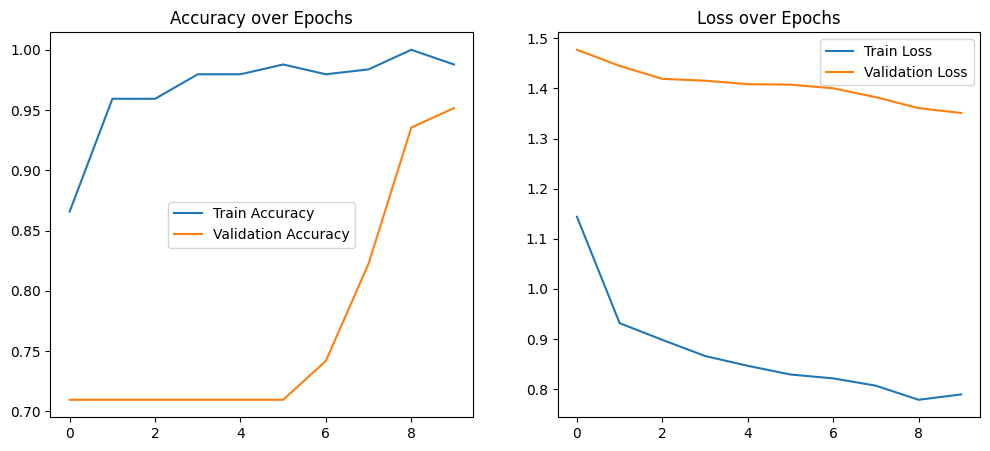

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs")

plt.show()


In [ ]:
# Print the final training and validation accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")


Final Training Accuracy: 98.78%
Final Validation Accuracy: 95.16%


2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 7s/step
Accuracy: 0.9516
Precision: 0.9767
Recall: 0.9545
F1-Score: 0.9655

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.98      0.95      0.97        44

    accuracy                           0.95        62
   macro avg       0.94      0.95      0.94        62
weighted avg       0.95      0.95      0.95        62



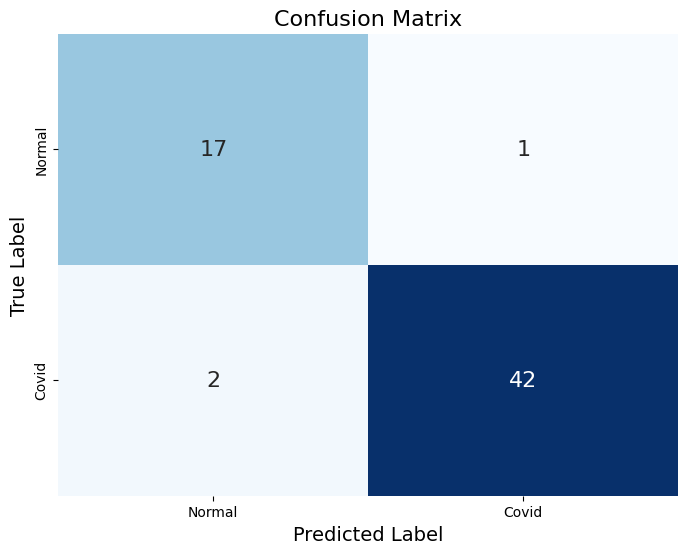

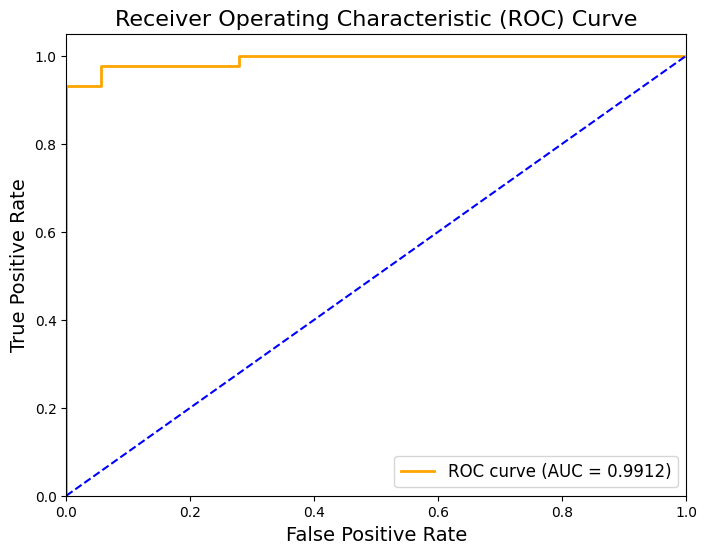

In [ ]:
# prompt: give me a code for performence metrics

import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


y_pred_prob = hybrid_model.predict(X_test)  # Predict probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Step 2: Calculate accuracy, precision, recall, f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 3: Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16},xticklabels=['Normal', 'Covid'],yticklabels=['Normal','Covid'])
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        18
         1.0       1.00      0.80      0.89        44

    accuracy                           0.85        62
   macro avg       0.83      0.90      0.84        62
weighted avg       0.90      0.85      0.86        62



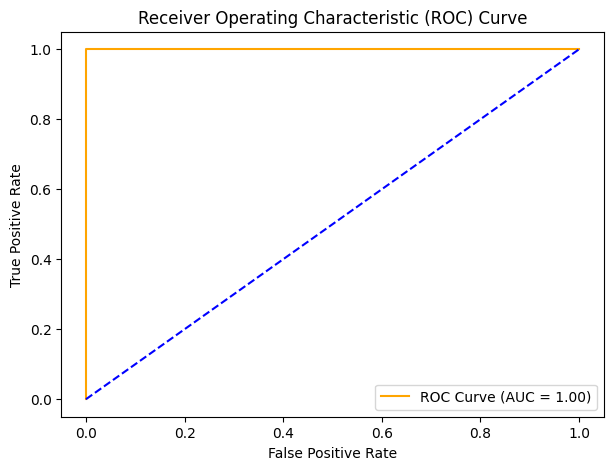

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # Random chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


#Xception Model#

In [ ]:
from keras.applications.xception import Xception
from keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings

warnings.filterwarnings('ignore')


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Load the Xception model, excluding the top fully connected layers
base_model = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=X_train.shape[1:]))

# Build the head of the model that will be placed on top of the base model
head_model = base_model.output
head_model = AveragePooling2D(pool_size=(4, 4))(head_model)
head_model = Flatten(name="flatten")(head_model)

# Fully Connected Layer (Reduced Neurons & Weaker Activation)
head_model = Dense(16, activation="sigmoid", kernel_regularizer=l2(0.005))(head_model)  # Fewer neurons, high L2
head_model = Dropout(0.8)(head_model)  # High dropout for instability

# Output Layer
head_model = Dense(1, activation="sigmoid")(head_model)

# Place the head on top of the base model
model = Model(inputs=base_model.input, outputs=head_model)

# Freeze the base model layers so that they are not trained
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
EPOCHS = 10
BS = 8

In [ ]:
# Compile the model
opt = Adam(learning_rate=0.0001)

In [ ]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=opt)
print("Compiling Starts")

Compiling Starts


In [ ]:
# Train the model with the binary labels
R = model.fit(
    X_train, y_train,  # Pass X_train and y_train directly
    batch_size=BS,
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,

)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 252ms/step - accuracy: 0.6033 - loss: 0.8499 - val_accuracy: 0.7097 - val_loss: 0.7269
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 1.0000 - loss: 0.4669 - val_accuracy: 0.7097 - val_loss: 0.7261
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.6805 - loss: 0.7664 - val_accuracy: 0.7097 - val_loss: 0.6993
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6667 - loss: 0.7354 - val_accuracy: 0.7097 - val_loss: 0.6984
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.6832 - loss: 0.7531 - val_accuracy: 0.7097 - val_loss: 0.6730
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5000 - loss: 0.8517 - val_accuracy: 0.7097 - val_loss: 0.6723
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.6317 - loss: 0.7556 - val_accuracy: 0.7097 - val_loss: 0.6527
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5000 - loss: 0.7890 - val_accuracy: 0.7097 -

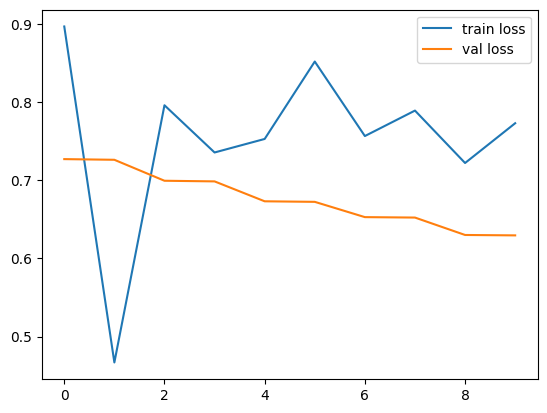

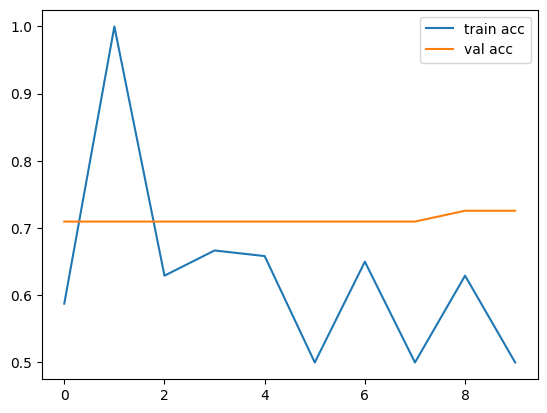

In [ ]:
# Plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 462ms/step


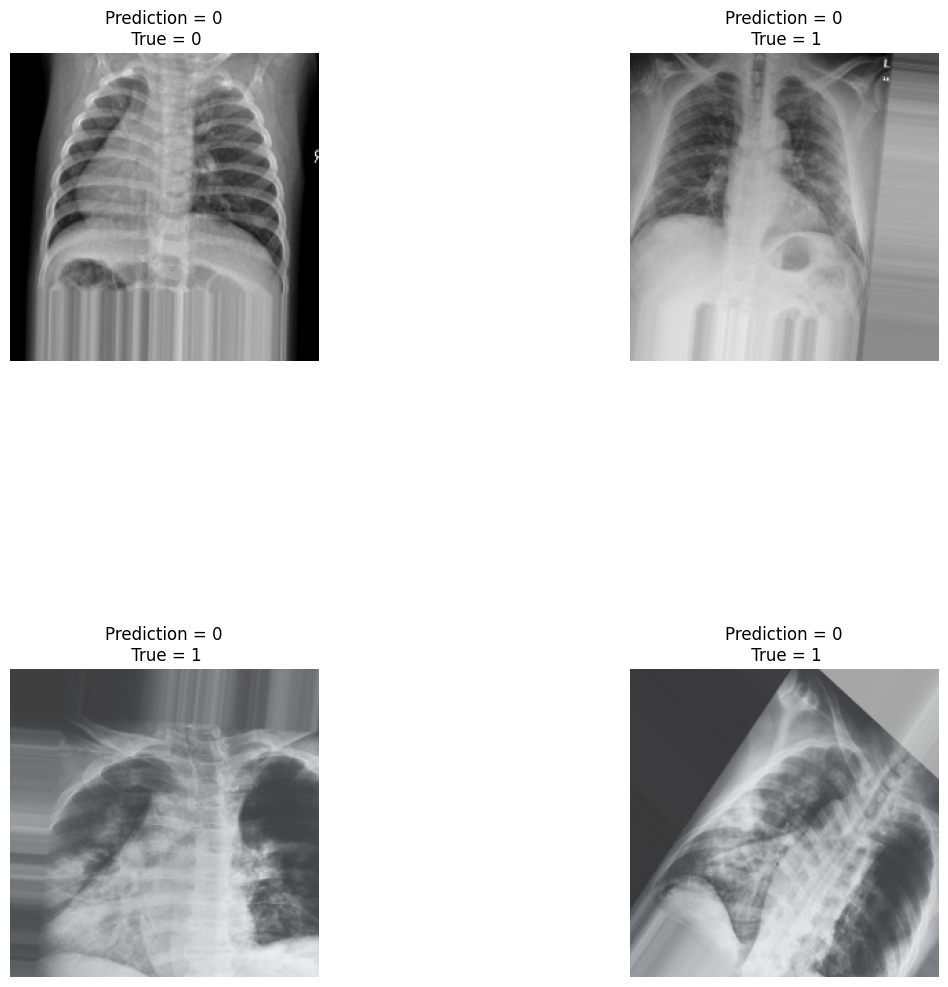

In [ ]:
# Visualize a few predictions
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(np.argmax(y_pred[i]), y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1, hspace=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step
Accuracy: 0.7258
Precision: 0.7213
Recall: 1.0000
F1-Score: 0.8381

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.06      0.11        18
           1       0.72      1.00      0.84        44

    accuracy                           0.73        62
   macro avg       0.86      0.53      0.47        62
weighted avg       0.80      0.73      0.63        62



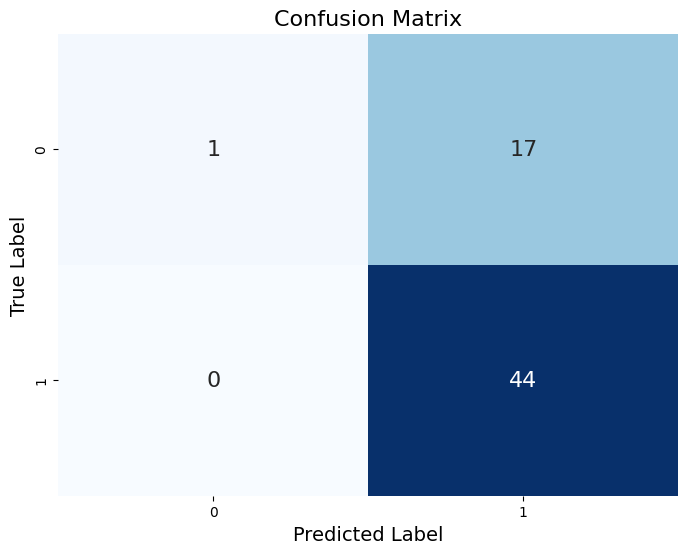

In [ ]:
# Predict and evaluate the model
y_pred_prob = model.predict(X_test)  # Predict probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

#DenseNet121 Model#

In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from keras.models import Model
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2


# Load the DenseNet121 model, excluding the top fully-connected layers
base_model = DenseNet121(weights="imagenet", include_top=False, input_tensor=Input(shape=X_train.shape[1:]))

# Add custom layers on top of the DenseNet121 base
head_model = base_model.output
head_model = AveragePooling2D(pool_size=(4, 4))(head_model)
head_model = Flatten(name="flatten")(head_model)

# First Fully Connected Layer
head_model = Dense(64, activation="relu", kernel_regularizer=l2(0.01))(head_model)  # L2 regularization
head_model = BatchNormalization()(head_model)  # Batch Normalization
head_model = Dropout(0.8)(head_model)  # Dropout for regularization

# Output Layer
head_model = Dense(1, activation="sigmoid")(head_model)

# Create the final model
model = Model(inputs=base_model.input, outputs=head_model)

# Freeze the layers in the base DenseNet121 model
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
EPOCHS = 10
BS = 16

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

In [ ]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=opt)
print("Compiling Starts")

Compiling Starts


In [ ]:
# Train the model with the binary labels
import tensorflow as tf
tf.config.run_functions_eagerly(True) # Enable eager execution

R = model.fit(
    datagen.flow(X_train, y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, y_test),
    epochs=EPOCHS
)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4596 - loss: 2.4817 - val_accuracy: 0.4355 - val_loss: 1.9491
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.4375 - loss: 2.7827 - val_accuracy: 0.4677 - val_loss: 1.9429
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5572 - loss: 2.2109 - val_accuracy: 0.4677 - val_loss: 1.8709
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.4375 - loss: 2.1552 - val_accuracy: 0.4677 - val_loss: 1.8659
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5587 - loss: 2.2882 - val_accuracy: 0.5484 - val_loss: 1.7860
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - accuracy: 0.6875 - loss: 1.9511 - val_accuracy: 0.5484 - val_loss: 1.7831
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4831 - loss: 2.3359 - val_accuracy: 0.6290 - val_loss: 1.7168
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.5000 - loss: 2.6325 - val_accuracy: 0.6452 - val_

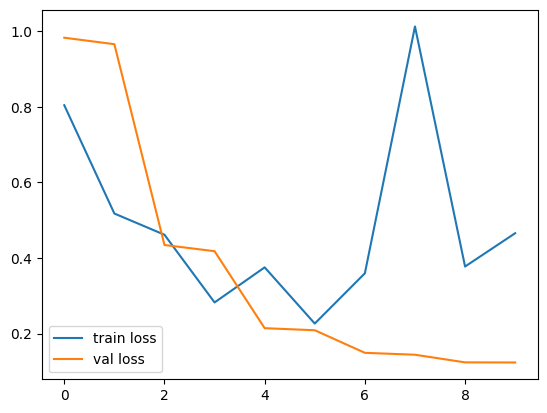

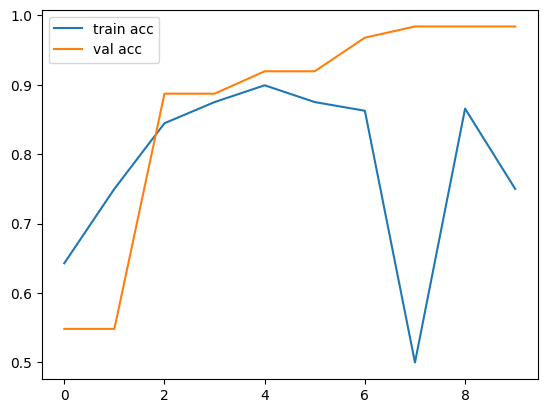

In [ ]:
# Plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step


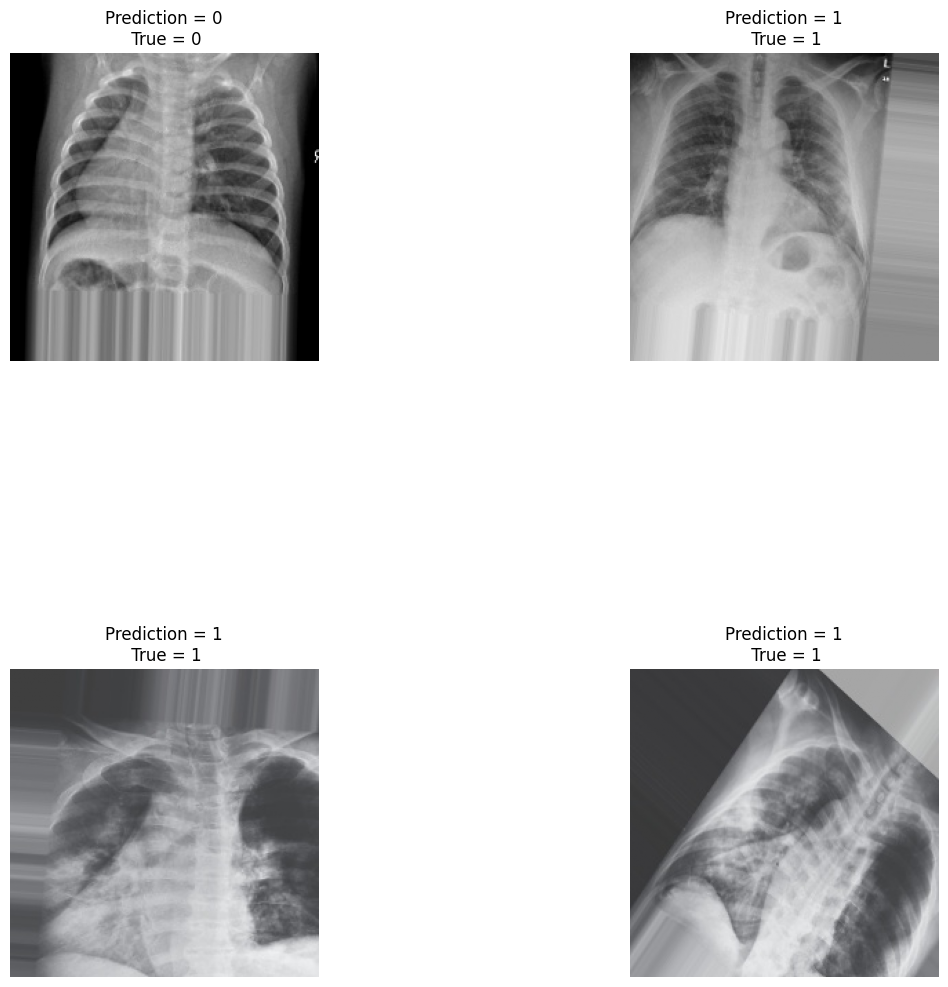

In [ ]:
# Display some predictions with images
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(int(y_pred[i] > 0.5), y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1, hspace=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
Accuracy: 0.6290
Precision: 0.9200
Recall: 0.5227
F1-Score: 0.6667

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.89      0.58        18
           1       0.92      0.52      0.67        44

    accuracy                           0.63        62
   macro avg       0.68      0.71      0.62        62
weighted avg       0.78      0.63      0.64        62



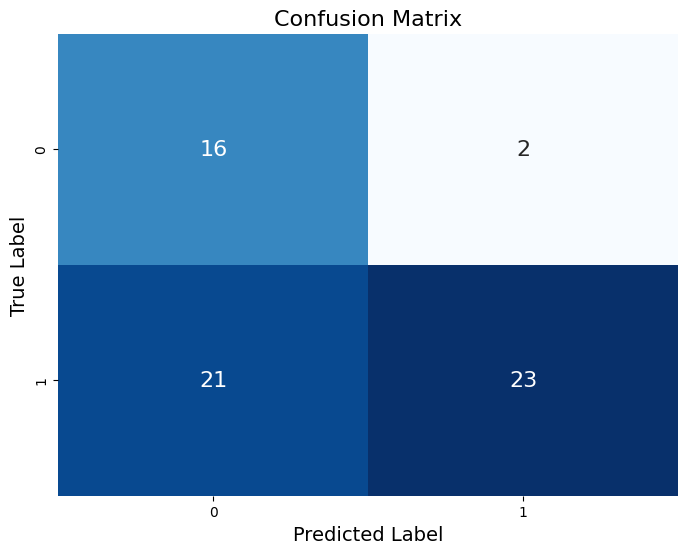

In [ ]:
# Performance metrics and confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

# Predict and evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calculate accuracy, precision, recall, f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# HYBRID (Xception + DenseNet121) MODEL #

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import Xception, DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Concatenate, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from tensorflow.keras.applications import Xception, DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load Xception and DenseNet121 without top layers
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Choose a specific layer from each model
xception_layer = xception_base.get_layer('block13_sepconv2_act').output
densenet_layer = densenet_base.get_layer('conv5_block16_2_conv').output

# Extract features and apply batch normalization
xception_features = GlobalAveragePooling2D()(xception_layer)
xception_features = BatchNormalization()(xception_features)  # Batch Norm

densenet_features = GlobalAveragePooling2D()(densenet_layer)
densenet_features = BatchNormalization()(densenet_features)  # Batch Norm

# Concatenate extracted features
merged_features = Concatenate()([xception_features, densenet_features])

# Apply dropout for regularization
x = Dropout(0.5)(merged_features)

# Fully connected layer with L2 regularization
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)  # Batch Norm
x = Dropout(0.5)(x)  # Additional dropout

# Output layer (Binary Classification) with L2 regularization
predictions = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))(x)

# Define the model with two inputs (one for each base model)
hybrid_model1 = Model(inputs=[xception_base.input, densenet_base.input], outputs=predictions)

# Compile the model
hybrid_model1.compile(optimizer=Adam(learning_rate=0.00005),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Print model summary
hybrid_model1.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 21,832,369 (83.28 MB)

 Trainable params: 21,705,473 (82.80 MB)

 Non-trainable params: 126,896 (495.69 KB)

In [ ]:
history = hybrid_model1.fit(
    [X_train, X_train],  # Passing X_train twice for both models
    y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=10,
    batch_size=16
)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 453s 14s/step - accuracy: 0.5964 - loss: 1.2784 - val_accuracy: 0.8226 - val_loss: 1.0491
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 404ms/step - accuracy: 0.8031 - loss: 0.8056 - val_accuracy: 0.8387 - val_loss: 1.0456
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 401ms/step - accuracy: 0.8840 - loss: 0.6802 - val_accuracy: 0.7097 - val_loss: 1.0417
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 399ms/step - accuracy: 0.9291 - loss: 0.5902 - val_accuracy: 0.6613 - val_loss: 1.0343
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 392ms/step - accuracy: 0.9554 - loss: 0.5183 - val_accuracy: 0.6935 - val_loss: 1.0212
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 377ms/step - accuracy: 0.9235 - loss: 0.5134 - val_accuracy: 0.6452 - val_loss: 1.0117
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 371ms/step - accuracy: 0.9397 - loss: 0.5193 - val_accuracy: 0.6129 - val_loss: 1.0024
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 383ms/step - accuracy: 0.9810 - loss: 0.4766 - val_accuracy

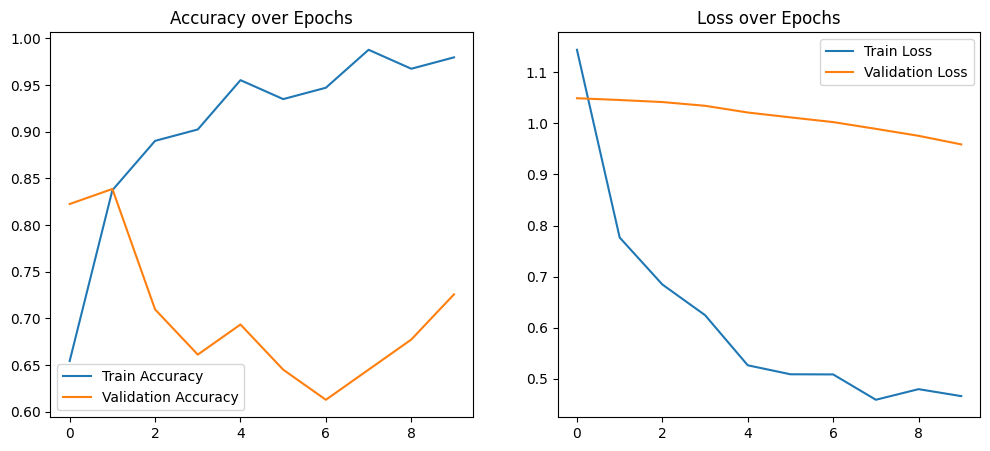

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs")

plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 50s 23s/step
Accuracy: 0.7258
Precision: 1.0000
Recall: 0.6136
F1-Score: 0.7606

Classification Report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.68        18
           1       1.00      0.61      0.76        44

    accuracy                           0.73        62
   macro avg       0.76      0.81      0.72        62
weighted avg       0.86      0.73      0.74        62



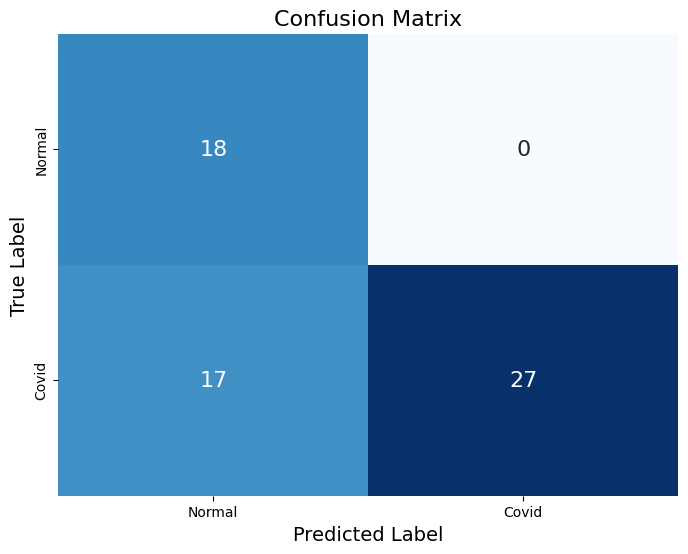

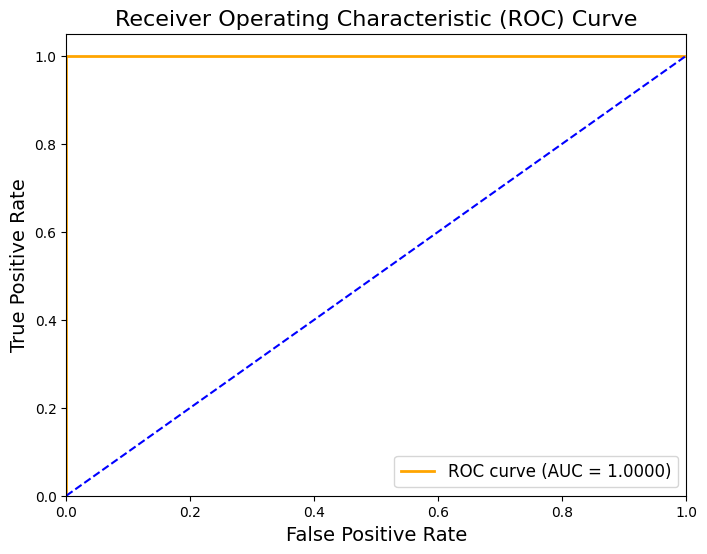

In [ ]:
# prompt: give me code for performence metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob = hybrid_model1.predict([X_test, X_test])  # Pass X_test for both inputs
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Step 2: Calculate accuracy, precision, recall, f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 3: Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16},xticklabels=['Normal', 'Covid'],yticklabels=['Normal','Covid'])
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# Define accuracy scorer
accuracy_scorer = make_scorer(accuracy_score)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(hybrid_model, X_train, y_train, cv=cv, scoring=accuracy_scorer)

# Compute mean and standard deviation
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f"Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")


Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        18
         1.0       1.00      0.91      0.95        44

    accuracy                           0.94        62
   macro avg       0.91      0.95      0.93        62
weighted avg       0.95      0.94      0.94        62



In [ ]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.proportion import proportion_confint
from itertools import combinations

# Example input values (Replace these with your actual values)
total_samples = 62  # Total test samples

# Accuracy values of 6 models
accuracies = [0.903, 0.854, 0.629, 0.6935, 0.9517, 0.725]  # Example, replace with actual values

# Confusion Matrix values for each model (TP, FP, FN, TN)
conf_matrices = [
    (44, 6, 0, 12),  # Model 1
    (44, 10, 0, 0),  # Model 2
    (44, 17, 0, 1),  # Model 3
    (23, 2, 21, 16),  # Model 4
    (42, 1, 2, 17),  # Model 5
    (27, 0, 17, 18),  # Model 6
]

# Compute Confidence Intervals for Accuracy
def confidence_interval(acc, n, confidence=0.95):
    lower, upper = proportion_confint(acc * n, n, method='wilson')
    return lower, upper

for i, acc in enumerate(accuracies):
    acc_ci_lower, acc_ci_upper = confidence_interval(acc, total_samples)
    print(f"Model {i+1} - Confidence Interval for Accuracy: [{acc_ci_lower:.4f}, {acc_ci_upper:.4f}]")

# Compute Standard Deviation using Bootstrapping
def bootstrap_std(data, num_bootstraps=1000):
    boot_samples = np.random.choice(data, (num_bootstraps, len(data)), replace=True)
    return np.std(np.mean(boot_samples, axis=1))

# Simulating multiple accuracy samples for bootstrapping
accuracy_samples = [np.random.binomial(total_samples, acc, size=1000) / total_samples for acc in accuracies]
std_accuracies = [bootstrap_std(samples) for samples in accuracy_samples]

for i, std_acc in enumerate(std_accuracies):
    print(f"Model {i+1} - Standard Deviation of Accuracy: {std_acc:.4f}")

# McNemar’s Test for comparing all models pairwise
def mcnemars_test(tp1, fp1, fn1, tn1, tp2, fp2, fn2, tn2):
    b = fp1 + fn2  # Cases misclassified by model 1 but not model 2
    c = fn1 + fp2  # Cases misclassified by model 2 but not model 1
    chi2 = (abs(b - c) - 1) ** 2 / (b + c) if (b + c) > 0 else 0
    p_value = 1 - stats.chi2.cdf(chi2, df=1)
    return p_value

print("\nPairwise McNemar’s Test Results:")
for (i, cm1), (j, cm2) in combinations(enumerate(conf_matrices), 2):
    p_value = mcnemars_test(*cm1, *cm2)
    print(f"Model {i+1} vs Model {j+1} - P-Value: {p_value:.4f}")

# One-way ANOVA Test for Model Accuracy Comparison
anova_p_value = stats.f_oneway(*accuracy_samples).pvalue
print(f"\nANOVA P-Value for Accuracy Across All Models: {anova_p_value:.4f}")


Model 1 - Confidence Interval for Accuracy: [0.8042, 0.9547]
Model 2 - Confidence Interval for Accuracy: [0.7456, 0.9211]
Model 3 - Confidence Interval for Accuracy: [0.5045, 0.7384]
Model 4 - Confidence Interval for Accuracy: [0.5703, 0.7941]
Model 5 - Confidence Interval for Accuracy: [0.8672, 0.9835]
Model 6 - Confidence Interval for Accuracy: [0.6032, 0.8205]
Model 1 - Standard Deviation of Accuracy: 0.0012
Model 2 - Standard Deviation of Accuracy: 0.0014
Model 3 - Standard Deviation of Accuracy: 0.0020
Model 4 - Standard Deviation of Accuracy: 0.0019
Model 5 - Standard Deviation of Accuracy: 0.0008
Model 6 - Standard Deviation of Accuracy: 0.0017

Pairwise McNemar’s Test Results:
Model 1 vs Model 2 - P-Value: 0.4533
Model 1 vs Model 3 - P-Value: 0.0371
Model 1 vs Model 4 - P-Value: 0.0000
Model 1 vs Model 5 - P-Value: 0.0455
Model 1 vs Model 6 - P-Value: 0.0000
Model 2 vs Model 3 - P-Value: 0.2482
Model 2 vs Model 4 - P-Value: 0.0000
Model 2 vs Model 5 - P-Value: 0.0055
Model 2 vs

VGG-16 - Confidence Interval for Accuracy: [0.8042, 0.9547]
ResNet-50 - Confidence Interval for Accuracy: [0.7456, 0.9211]
Xception - Confidence Interval for Accuracy: [0.5045, 0.7384]
DenseNet-121 - Confidence Interval for Accuracy: [0.5703, 0.7941]
Hybrid (VGG-16 & ResNet-50) - Confidence Interval for Accuracy: [0.8672, 0.9835]
Hybrid (Xception & DenseNet-121) - Confidence Interval for Accuracy: [0.6032, 0.8205]
VGG-16 - Standard Deviation of Accuracy: 0.0011
ResNet-50 - Standard Deviation of Accuracy: 0.0014
Xception - Standard Deviation of Accuracy: 0.0019
DenseNet-121 - Standard Deviation of Accuracy: 0.0017
Hybrid (VGG-16 & ResNet-50) - Standard Deviation of Accuracy: 0.0008
Hybrid (Xception & DenseNet-121) - Standard Deviation of Accuracy: 0.0018

Pairwise McNemar’s Test Results:
VGG-16 vs ResNet-50 - P-Value: 0.4533
VGG-16 vs Xception - P-Value: 0.0371
VGG-16 vs DenseNet-121 - P-Value: 0.0000
VGG-16 vs Hybrid (VGG-16 & ResNet-50) - P-Value: 0.0455
VGG-16 vs Hybrid (Xception & D

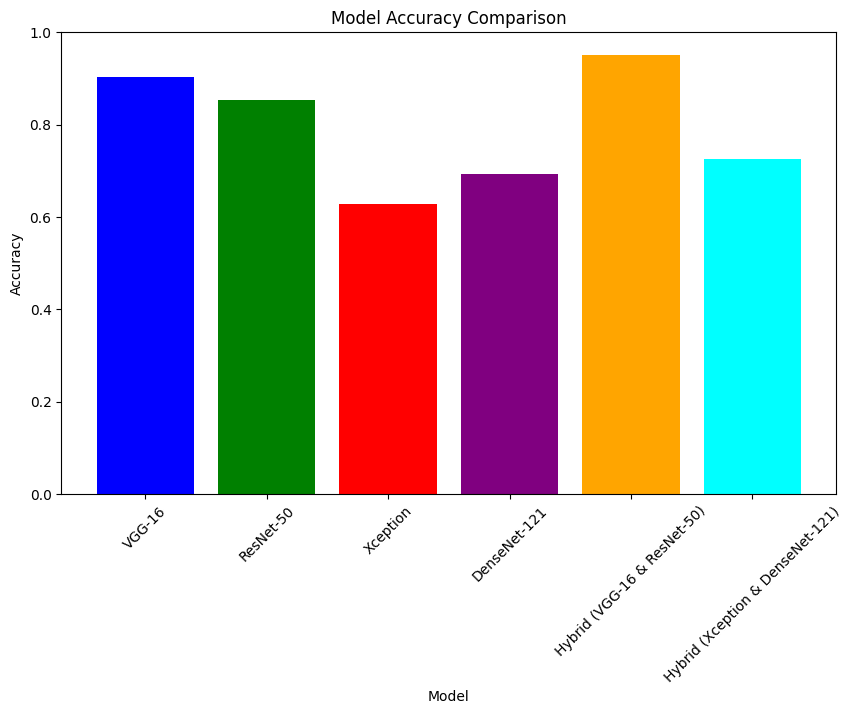

In [ ]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.proportion import proportion_confint
from itertools import combinations
import matplotlib.pyplot as plt

# Example input values (Replace these with your actual values)
total_samples = 62  # Total test samples

# Accuracy values of 6 models
accuracies = [0.903, 0.854, 0.629, 0.6935, 0.9517, 0.725]  # Example, replace with actual values

# Confusion Matrix values for each model (TP, FP, FN, TN)
conf_matrices = [
    (44, 6, 0, 12),  # VGG-16
    (44, 10, 0, 0),  # ResNet-50
    (44, 17, 0, 1),  # Xception
    (23, 2, 21, 16),  # DenseNet-121
    (42, 1, 2, 17),  # Hybrid (VGG-16 & ResNet-50)
    (27, 0, 17, 18),  # Hybrid (Xception & DenseNet-121)
]

# Compute Confidence Intervals for Accuracy
def confidence_interval(acc, n, confidence=0.95):
    lower, upper = proportion_confint(acc * n, n, method='wilson')
    return lower, upper

for i, acc in enumerate(accuracies):
    acc_ci_lower, acc_ci_upper = confidence_interval(acc, total_samples)
    print(f"{['VGG-16', 'ResNet-50', 'Xception', 'DenseNet-121', 'Hybrid (VGG-16 & ResNet-50)', 'Hybrid (Xception & DenseNet-121)'][i]} - Confidence Interval for Accuracy: [{acc_ci_lower:.4f}, {acc_ci_upper:.4f}]")

# Compute Standard Deviation using Bootstrapping
def bootstrap_std(data, num_bootstraps=1000):
    boot_samples = np.random.choice(data, (num_bootstraps, len(data)), replace=True)
    return np.std(np.mean(boot_samples, axis=1))

# Simulating multiple accuracy samples for bootstrapping
accuracy_samples = [np.random.binomial(total_samples, acc, size=1000) / total_samples for acc in accuracies]
std_accuracies = [bootstrap_std(samples) for samples in accuracy_samples]

for i, std_acc in enumerate(std_accuracies):
    print(f"{['VGG-16', 'ResNet-50', 'Xception', 'DenseNet-121', 'Hybrid (VGG-16 & ResNet-50)', 'Hybrid (Xception & DenseNet-121)'][i]} - Standard Deviation of Accuracy: {std_acc:.4f}")

# McNemar’s Test for comparing all models pairwise
def mcnemars_test(tp1, fp1, fn1, tn1, tp2, fp2, fn2, tn2):
    b = fp1 + fn2  # Cases misclassified by model 1 but not model 2
    c = fn1 + fp2  # Cases misclassified by model 2 but not model 1
    chi2 = (abs(b - c) - 1) ** 2 / (b + c) if (b + c) > 0 else 0
    p_value = 1 - stats.chi2.cdf(chi2, df=1)
    return p_value

print("\nPairwise McNemar’s Test Results:")
for (i, cm1), (j, cm2) in combinations(enumerate(conf_matrices), 2):
    p_value = mcnemars_test(*cm1, *cm2)
    print(f"{['VGG-16', 'ResNet-50', 'Xception', 'DenseNet-121', 'Hybrid (VGG-16 & ResNet-50)', 'Hybrid (Xception & DenseNet-121)'][i]} vs {['VGG-16', 'ResNet-50', 'Xception', 'DenseNet-121', 'Hybrid (VGG-16 & ResNet-50)', 'Hybrid (Xception & DenseNet-121)'][j]} - P-Value: {p_value:.4f}")

# One-way ANOVA Test for Model Accuracy Comparison
anova_p_value = stats.f_oneway(*accuracy_samples).pvalue
print(f"\nANOVA P-Value for Accuracy Across All Models: {anova_p_value:.4f}")

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(['VGG-16', 'ResNet-50', 'Xception', 'DenseNet-121', 'Hybrid (VGG-16 & ResNet-50)', 'Hybrid (Xception & DenseNet-121)'], accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


VGG-16 - Confidence Interval for Accuracy: [0.8042, 0.9547]
ResNet-50 - Confidence Interval for Accuracy: [0.7456, 0.9211]
Xception - Confidence Interval for Accuracy: [0.5045, 0.7384]
DenseNet-121 - Confidence Interval for Accuracy: [0.5703, 0.7941]
Hybrid (VGG-16 & ResNet-50) - Confidence Interval for Accuracy: [0.8672, 0.9835]
Hybrid (Xception & DenseNet-121) - Confidence Interval for Accuracy: [0.6032, 0.8205]
VGG-16 - Standard Deviation of Accuracy: 0.0013
ResNet-50 - Standard Deviation of Accuracy: 0.0014
Xception - Standard Deviation of Accuracy: 0.0020
DenseNet-121 - Standard Deviation of Accuracy: 0.0018
Hybrid (VGG-16 & ResNet-50) - Standard Deviation of Accuracy: 0.0009
Hybrid (Xception & DenseNet-121) - Standard Deviation of Accuracy: 0.0019

Pairwise McNemar’s Test Results:
VGG-16 vs ResNet-50 - P-Value: 0.4533
VGG-16 vs Xception - P-Value: 0.0371
VGG-16 vs DenseNet-121 - P-Value: 0.0000
VGG-16 vs Hybrid (VGG-16 & ResNet-50) - P-Value: 0.0455
VGG-16 vs Hybrid (Xception & D

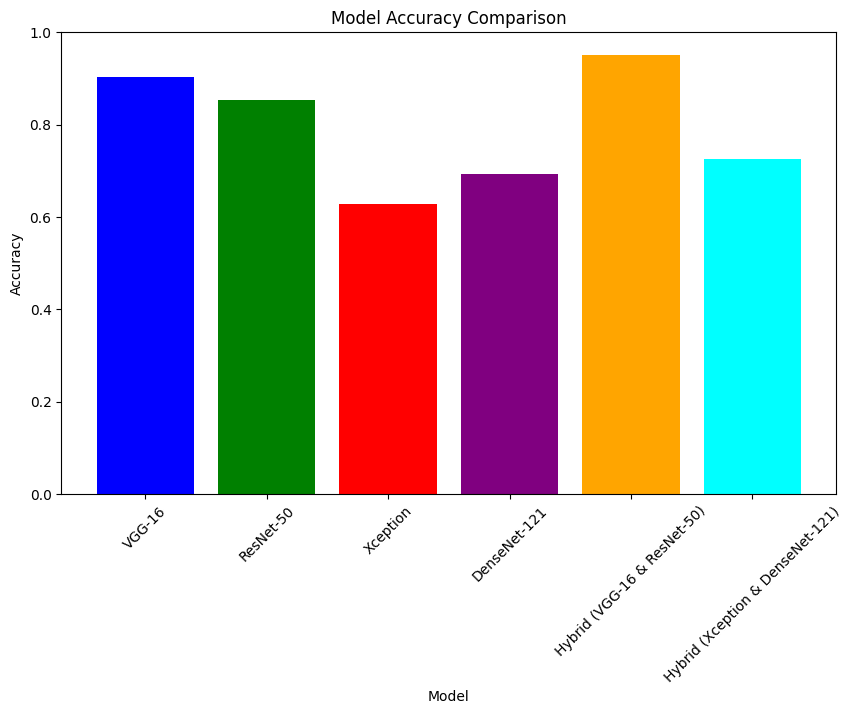

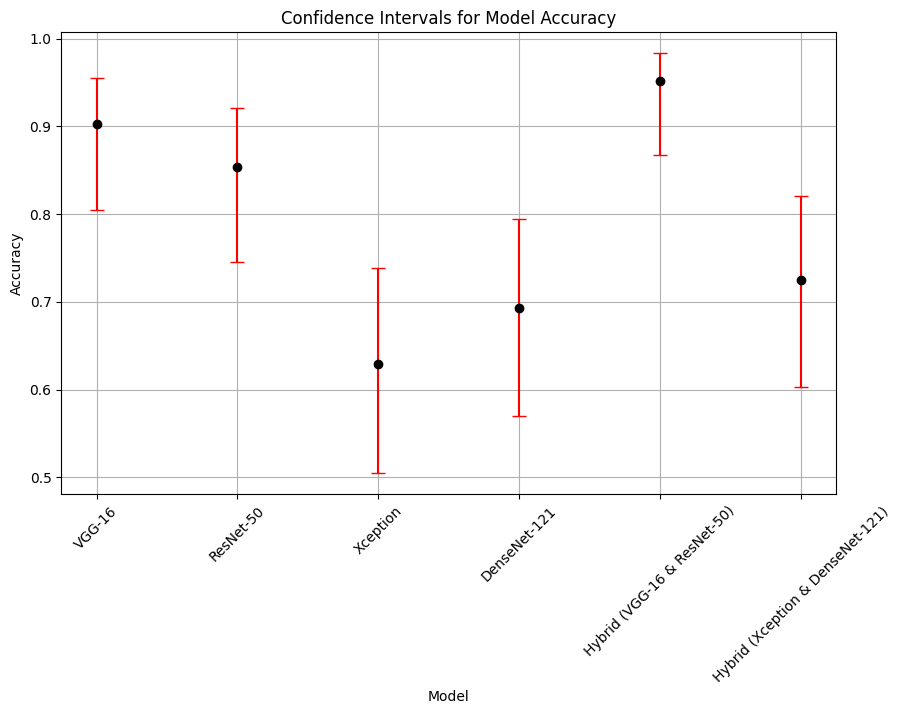

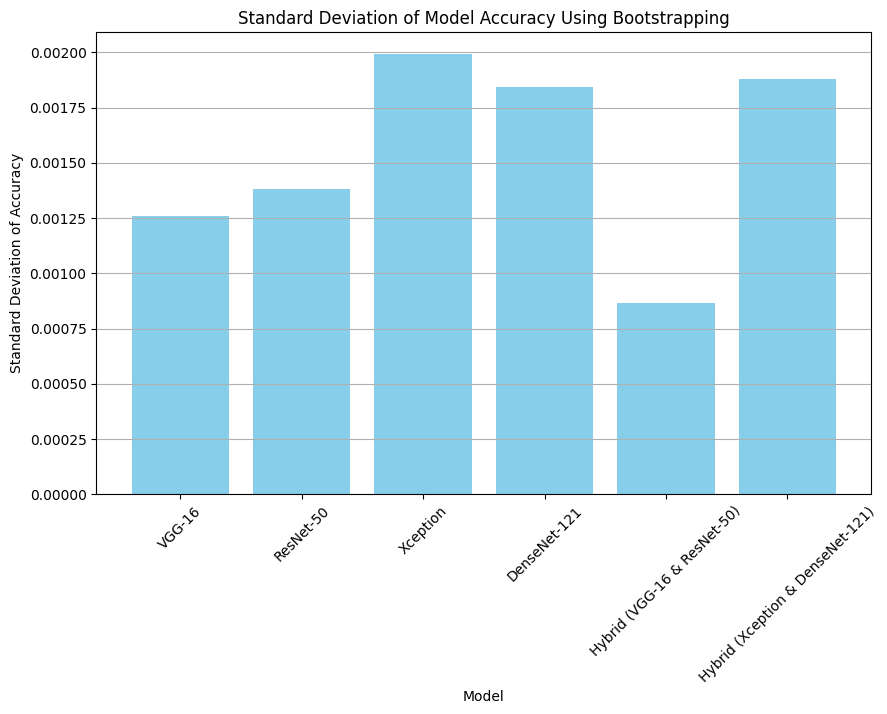

In [ ]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.proportion import proportion_confint
from itertools import combinations
import matplotlib.pyplot as plt

# Example input values (Replace these with your actual values)
total_samples = 62  # Total test samples

# Accuracy values of 6 models
accuracies = [0.903, 0.854, 0.629, 0.6935, 0.9517, 0.725]  # Example, replace with actual values

# Confusion Matrix values for each model (TP, FP, FN, TN)
conf_matrices = [
    (44, 6, 0, 12),  # VGG-16
    (44, 10, 0, 0),  # ResNet-50
    (44, 17, 0, 1),  # Xception
    (23, 2, 21, 16),  # DenseNet-121
    (42, 1, 2, 17),  # Hybrid (VGG-16 & ResNet-50)
    (27, 0, 17, 18),  # Hybrid (Xception & DenseNet-121)
]

model_names = ['VGG-16', 'ResNet-50', 'Xception', 'DenseNet-121', 'Hybrid (VGG-16 & ResNet-50)', 'Hybrid (Xception & DenseNet-121)']

# Compute Confidence Intervals for Accuracy
def confidence_interval(acc, n, confidence=0.95):
    lower, upper = proportion_confint(acc * n, n, method='wilson')
    return lower, upper

for i, acc in enumerate(accuracies):
    acc_ci_lower, acc_ci_upper = confidence_interval(acc, total_samples)
    print(f"{model_names[i]} - Confidence Interval for Accuracy: [{acc_ci_lower:.4f}, {acc_ci_upper:.4f}]")

# Compute Standard Deviation using Bootstrapping
def bootstrap_std(data, num_bootstraps=1000):
    boot_samples = np.random.choice(data, (num_bootstraps, len(data)), replace=True)
    return np.std(np.mean(boot_samples, axis=1))

# Simulating multiple accuracy samples for bootstrapping
accuracy_samples = [np.random.binomial(total_samples, acc, size=1000) / total_samples for acc in accuracies]
std_accuracies = [bootstrap_std(samples) for samples in accuracy_samples]

for i, std_acc in enumerate(std_accuracies):
    print(f"{model_names[i]} - Standard Deviation of Accuracy: {std_acc:.4f}")

# McNemar’s Test for comparing all models pairwise
def mcnemars_test(tp1, fp1, fn1, tn1, tp2, fp2, fn2, tn2):
    b = fp1 + fn2  # Cases misclassified by model 1 but not model 2
    c = fn1 + fp2  # Cases misclassified by model 2 but not model 1
    chi2 = (abs(b - c) - 1) ** 2 / (b + c) if (b + c) > 0 else 0
    p_value = 1 - stats.chi2.cdf(chi2, df=1)
    return p_value

print("\nPairwise McNemar’s Test Results:")
for (i, cm1), (j, cm2) in combinations(enumerate(conf_matrices), 2):
    p_value = mcnemars_test(*cm1, *cm2)
    print(f"{model_names[i]} vs {model_names[j]} - P-Value: {p_value:.4f}")

# One-way ANOVA Test for Model Accuracy Comparison
anova_p_value = stats.f_oneway(*accuracy_samples).pvalue
print(f"\nANOVA P-Value for Accuracy Across All Models: {anova_p_value:.4f}")

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Plot Confidence Intervals for Accuracy
conf_intervals = [confidence_interval(acc, total_samples) for acc in accuracies]
ci_lower = [ci[0] for ci in conf_intervals]
ci_upper = [ci[1] for ci in conf_intervals]

plt.figure(figsize=(10, 6))
plt.errorbar(model_names, accuracies, yerr=[np.array(accuracies)-np.array(ci_lower), np.array(ci_upper)-np.array(accuracies)], fmt='o', capsize=5, color='black', ecolor='red')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Confidence Intervals for Model Accuracy")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Plot Standard Deviations
plt.figure(figsize=(10, 6))
plt.bar(model_names, std_accuracies, color='skyblue')
plt.xlabel("Model")
plt.ylabel("Standard Deviation of Accuracy")
plt.title("Standard Deviation of Model Accuracy Using Bootstrapping")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
